In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100 
import matplotlib.pyplot as plt
import sys  
import pandas as pd
#sys.path.append("../")  
from pulse_analysis import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fym7a8nr because the default path (/home/salvador/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
filename = './data/pulseSweep_0_16_1w_100rep_0_128_2.pcap'
filename = './data/pulseSweep_0_16_1w_100rep_50_51_1_100e_3_2_100e_3V_2300isel_1_75vped2.pcap'
filename = './data/pulseSweep_0_16_1w_100rep_50_51_1_100e_3_3V_2300isel_1_75vped.pcap'

In [3]:
nmbrWin = 16
rep = 100
df=process_packet_pulseSweep(filename,0,nmbrWin)


478400
ALL PACKETS CONVERTED


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,29890,29891,29892,29893,29894,29895,29896,29897,29898,29899
0,206,199,201,200,200,201,200,200,201,201,...,193,192,192,192,192,192,194,192,192,193
1,207,200,200,200,200,203,200,200,203,203,...,195,194,194,195,195,194,195,195,194,195
2,212,199,202,202,202,202,201,199,202,202,...,194,194,194,194,194,194,193,191,191,194
3,214,200,203,203,202,202,202,203,203,202,...,195,195,194,195,195,194,194,195,195,194
4,216,201,202,204,205,203,203,203,206,204,...,196,195,198,196,196,198,197,195,195,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,199,199,201,201,202,204,201,202,202,204,...,191,192,193,192,192,193,193,191,191,194
508,200,201,201,201,201,201,201,201,204,204,...,193,193,196,191,193,196,196,193,193,196
509,200,202,203,203,203,203,203,203,206,206,...,194,196,194,191,194,193,193,193,193,195
510,201,201,201,200,200,200,201,202,201,201,...,193,193,193,190,193,193,193,192,193,192


In [5]:
29900/100

299.0

In [6]:
70/100

0.7

In [7]:
150/16

9.375

Window 8 to 12

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

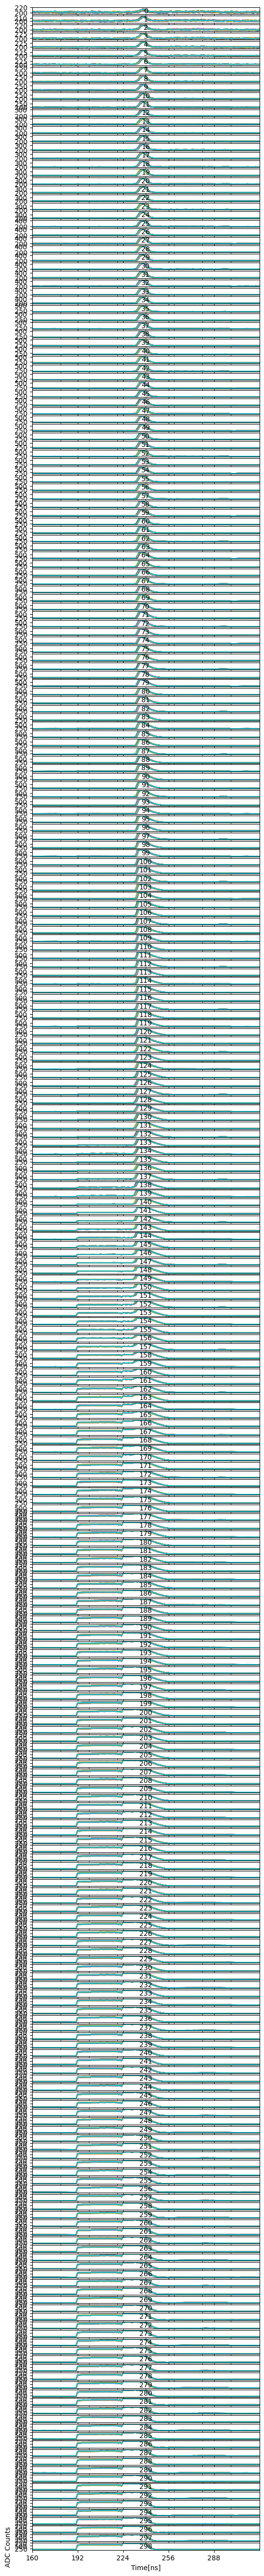

In [8]:
sweepPositions = 299
nmbrSamples= 32*nmbrWin
#rep=40pulseSweep_0_511_1w_1rep_0_500_100_osc_5.pcap
fig, axes = plt.subplots(sweepPositions, 1)
for i in range(0,sweepPositions,1):
    df.iloc[:,i*rep:(i+1)*rep].plot(ax=axes[i], xticks=list(range(32*4,32*10,32)), legend=False, sharex=True, xlim=(32*5,32*10) )  
    plt.text(0.5, 0.5, '{}'.format(i), horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
   # axes[i].scatter(df.iloc[:,rep*i:rep*(i+1)].idxmax(),df.iloc[:,rep*i:rep*(i+1)].max(), marker='o', c='k')
#    axes[i].grid()
plt.xlabel('Time[ns]')
plt.ylabel('ADC Counts')
plt.subplots_adjust( bottom=18, top=31)
#plt.savefig('PulseSweep.png')
plt.show()

In [9]:
df_max= df.max()
df_idxmax=df.idxmax()

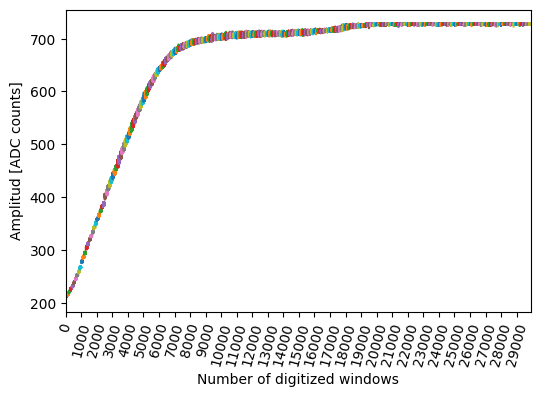

In [10]:
standard = list()
avg = list()
fig3, axes3 = plt.subplots(1, 1)
for l in range(0,sweepPositions,1):
    df_max[l*rep:(l+1)*rep].plot()
    standard.append(df_max[l*rep:(l+1)*rep].std())
    avg.append(df_max[l*rep:(l+1)*rep].mean())
axes3.set(xlabel= 'Number of digitized windows', ylabel='Amplitud [ADC counts]',xticks=list(range(0,100*300,1000)) )
axes3.tick_params(axis='x', labelrotation=75)

plt.show()

In [11]:
#fig10, axes10 = plt.subplots(sweepPositions, 1)
#for l in range(0,sweepPositions,1):
#    df_max[l*rep:(l+1)*rep].hist(ax=axes10[l], range=(df_max[l*rep:(l+1)*rep].min(),df_max[l*rep:(l+1)*rep].max()), bins= df_max[l*rep:(l+1)*rep].max()- df_max[l*rep:(l+1)*rep].min())
##    standard.append(df_max[l*rep:(l+1)*rep].std())
##    avg.append(df_max[l*rep:(l+1)*rep].mean())
##axes3.set(xlabel= 'Number of digitized windows', ylabel='Amplitud [ADC counts]' )
#plt.subplots_adjust( bottom=10, top=31)

#plt.show()

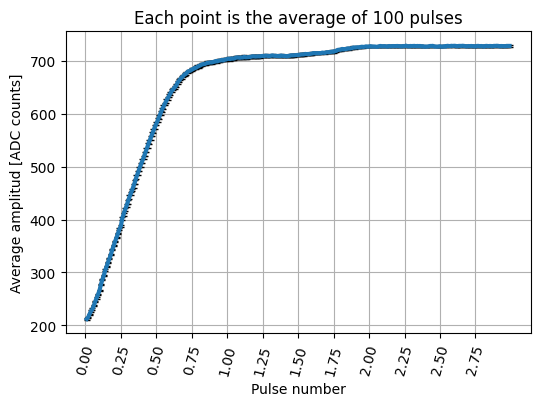

In [12]:
x = list(np.arange(0.01,3,0.01))
#x =list(range(0,sweepPositions,1))
fig7,axes7 = plt.subplots(1,1)
axes7.errorbar(x,avg, yerr=standard, ecolor='k', capsize=2, lw=3, elinewidth=1)
#axes7.set(xticks=list(range(0,32*5,32)))
axes7.set(xlabel= 'Pulse number', ylabel='Average amplitud [ADC counts]' ,title='Each point is the average of 100 pulses',xticks=list(np.arange(0,0.01*300,0.25)))
axes7.tick_params(axis='x', labelrotation=75)
plt.grid()
plt.show()

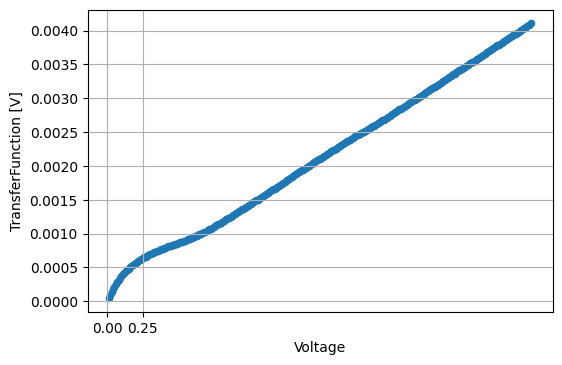

In [13]:
figTF, axisTF= plt.subplots(1,1)
dataTF= {'Voltage':x, 'Counts':avg}
df_tf = pd.DataFrame(data=dataTF)
df_tf['TransferFunction [V]']= df_tf.Voltage/df_tf.Counts
df_tf.plot.scatter(x='Voltage',y='TransferFunction [V]', ax=axisTF)
axisTF.set(xticks=list(np.arange(0,0.01*50,0.25)))

axisTF.grid()

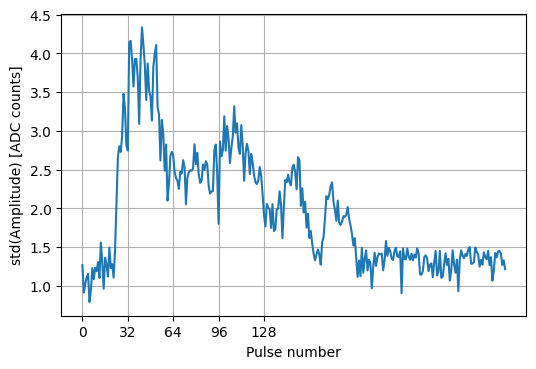

In [14]:
fig4,axes4 = plt.subplots(1,1)
axes4.plot(standard)
axes4.set(xticks=list(range(0,32*5,32)))
axes4.set(xlabel= 'Pulse number', ylabel='std(Amplitude) [ADC counts]',xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

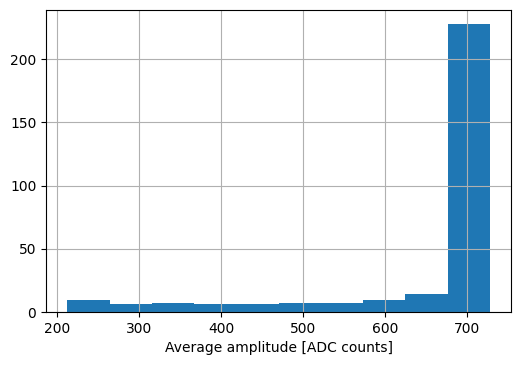

In [15]:
fig8,axes8 = plt.subplots(1,1)
axes8.hist(avg)
axes8.set(xlabel='Average amplitude [ADC counts]' )
#axes8.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [16]:

standardIdx = list()
avg_idx = list()
#fig5, axes5 = plt.subplots(1, 1)
for l in range(0,sweepPositions,1):
  #  df_idxmax[m::256].plot(ax=axes5)
    standardIdx.append(df_idxmax[l*rep:(l+1)*rep].std())
    avg_idx.append(df_idxmax[l*rep:(l+1)*rep].mean())

#plt.show()

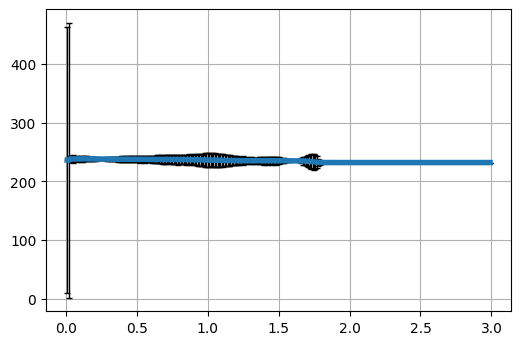

In [17]:
fig10,axes10 = plt.subplots(1,1)
axes10.errorbar(x,avg_idx, yerr=[x*10 for x in standardIdx], ecolor='k', capsize=2, lw=4, elinewidth=1)
#axes10.set(xticks=list(range(0,32*5,32)))
plt.grid()
plt.show()

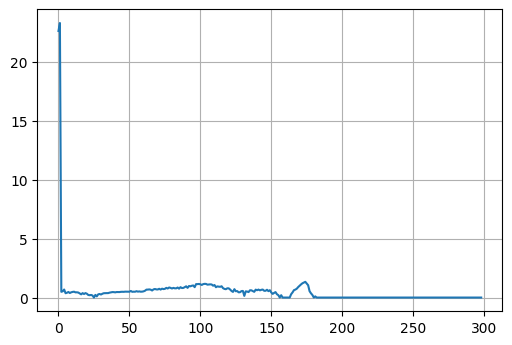

In [18]:
fig6,axes6 = plt.subplots(1,1)
axes6.plot(standardIdx)
#axes6.set(xticks=list(range(0,32*4,32)))
plt.grid()
plt.show()

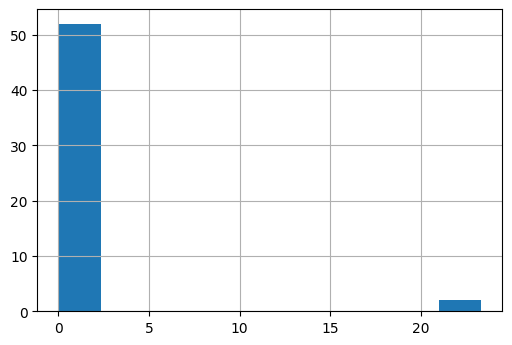

In [19]:
fig7,axes7 = plt.subplots(1,1)
axes7.hist(standardIdx[0:54])
#axes6.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [20]:
np.std(standardIdx[0:55])

4.2308811754789115

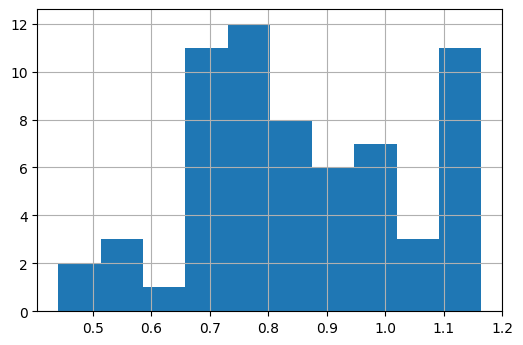

In [21]:
fig7,axes7 = plt.subplots(1,1)
axes7.hist(standardIdx[64:128])
#axes6.set(xticks=list(range(0,32*8,32)))
plt.grid()
plt.show()

In [22]:
np.std(standardIdx[56:128])

0.19606210989465003